## Data Head
|   time |          A |         B |          C |         D |         E |          F |          G |          H |         I |         J |         K |         L |          M |           N |         Y1 |        Y2 |
|-------:|-----------:|----------:|-----------:|----------:|----------:|-----------:|-----------:|-----------:|----------:|----------:|----------:|----------:|-----------:|------------:|-----------:|----------:|
|      0 |  0.207366  | -0.159951 | -0.634176  | -0.580962 | -0.266505 |  0.0601735 | -0.475257  | -1.48652   | -0.332594 | -0.671466 | -0.226149 | -0.187624 | -0.780237  | -0.785965   | -0.935902  | -0.310081 |
|      1 |  0.188828  | -0.265508 |  0.0421432 | -0.550442 | -0.132319 | -0.185219  |  0.028295  |  0.0932102 | -0.518139 | -0.251917 | -0.347845 | -0.359069 | -0.161254  |  0.020401   | -0.0897071 | -0.305374 |
|      2 | -0.144261  | -0.577142 | -0.214634  | -0.747391 | -0.184255 | -0.464831  | -0.0851812 |  0.700449  | -0.603438 |  0.197773 | -0.

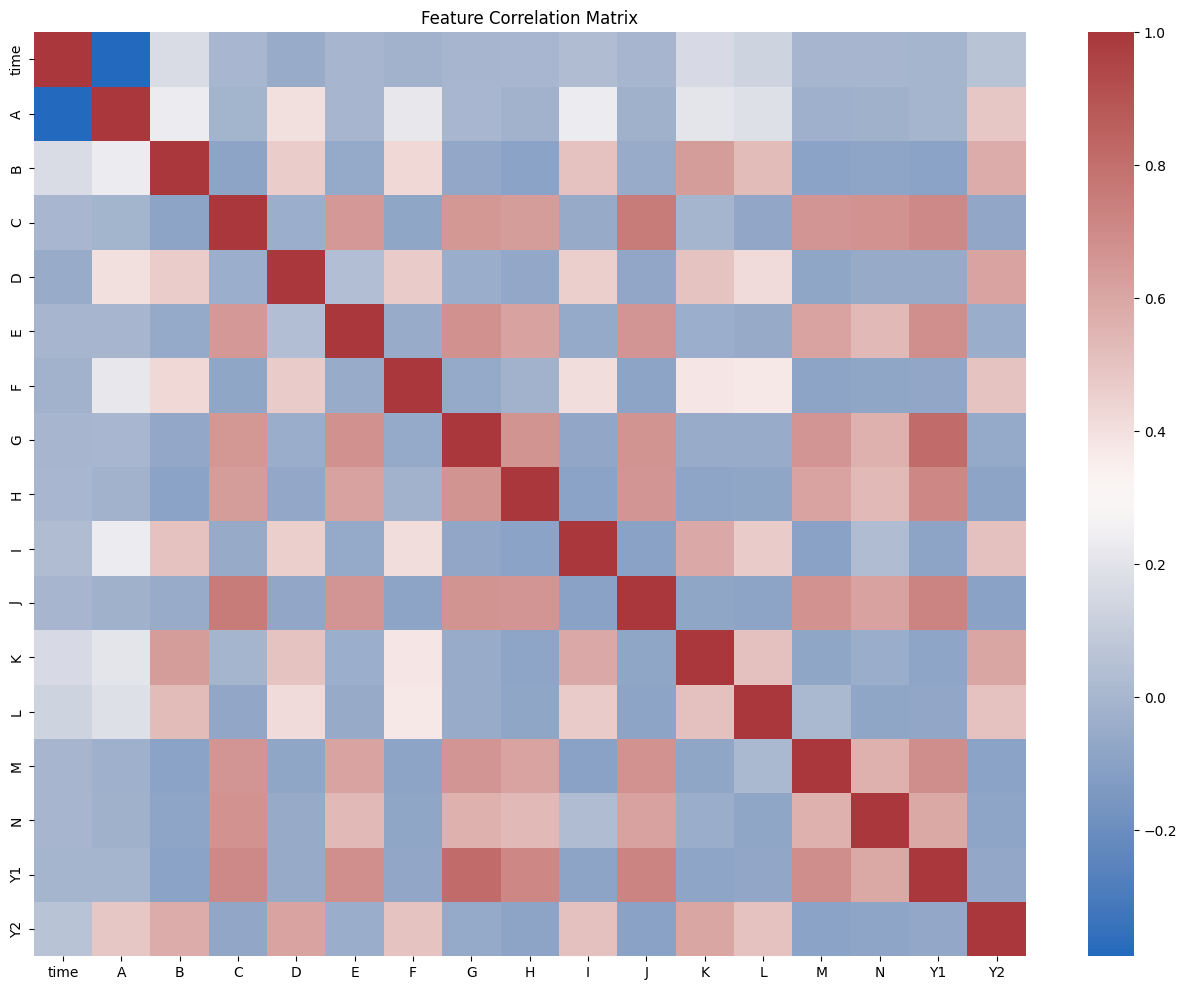


## Target Variable Stationarity (ADF Test)
ADF Test for Y1: p-value = 0.0000
ADF Test for Y2: p-value = 0.0000


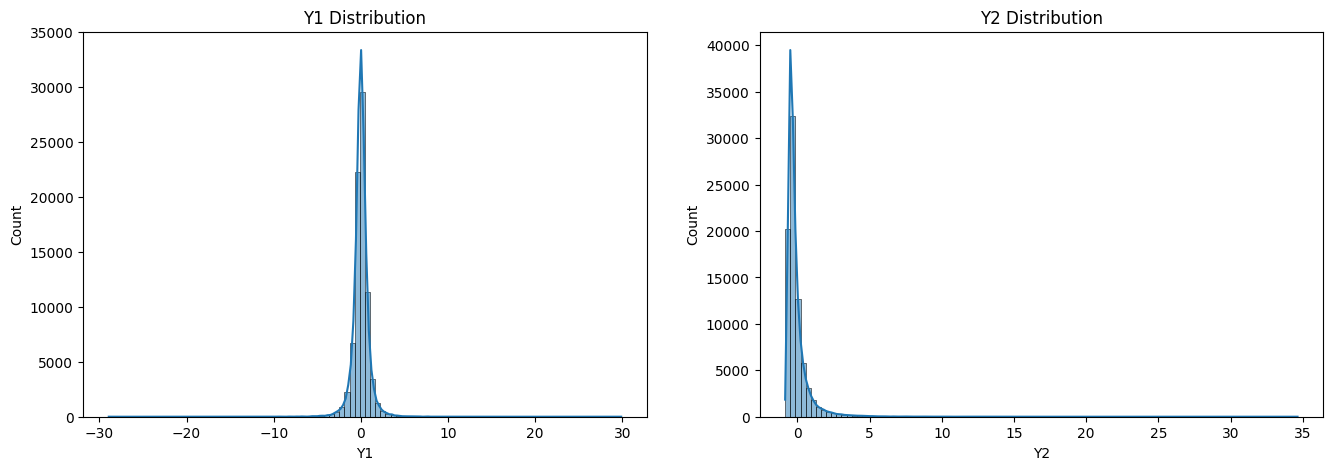

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Load the training data
try:
    df_train = pd.read_csv('data/train.csv')
except FileNotFoundError:
    print("Make sure 'train.csv' is in the same directory.")
    exit()

# --- Section 1: Basic Information & Summary ---
print("## Data Head")
print(df_train.head().to_markdown(index=False))
print("\n## Data Info")
df_train.info()
print("\n## Summary Statistics")
print(df_train.describe().T.to_markdown())
print("\n## Missing Values")
print(df_train.isnull().sum())


# --- Section 2: Correlation Analysis ---
print("\n## Correlation Matrix")
# Calculate correlation matrix
corr_matrix = df_train.corr()
# Print correlations with targets
print("### Correlations with Y1 and Y2:")
print(corr_matrix[['Y1', 'Y2']].sort_values(by='Y1', ascending=False).to_markdown())

# Optional: Visualize the full heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap='vlag', annot=False)
plt.title('Feature Correlation Matrix')
plt.show()


# --- Section 3: Target Variable Analysis ---
print("\n## Target Variable Stationarity (ADF Test)")
# An ADF test helps determine if the time-series is stationary.
# A p-value <= 0.05 indicates the series is likely stationary.
adf_y1 = adfuller(df_train['Y1'].dropna())
adf_y2 = adfuller(df_train['Y2'].dropna())
print(f"ADF Test for Y1: p-value = {adf_y1[1]:.4f}")
print(f"ADF Test for Y2: p-value = {adf_y2[1]:.4f}")

# Optional: Visualize target distributions
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.histplot(df_train['Y1'], bins=100, ax=axes[0], kde=True).set_title('Y1 Distribution')
sns.histplot(df_train['Y2'], bins=100, ax=axes[1], kde=True).set_title('Y2 Distribution')
plt.show()